Following the tutorial from the allen institute for predicting labels from AIFI.

Overall impression is a really really good experience with this package !!!!

https://apps.allenimmunology.org/aifi/resources/imm-health-atlas/labeling/

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import harmonypy as hm
import anndata
import os
import scrublet

# new packages 
import muon as mu # multi-modal anndatas
import celltypist # automated label predictions
import scirpy # immune cell repertoire analysis

#sc.settings.set_figure_params(dpi=500, dpi_save=1000, figsize=(5,5), facecolor='white')

In [4]:
os.chdir('/home/groups/singlecell/smorabito/analysis/SERPENTINE/')
data_dir = 'data/'
fig_dir = 'figures/'


In [5]:
adata = sc.read_h5ad('{}SERPENTINE_PCA_111124.h5ad'.format(data_dir))

In [9]:
adata_full = adata.copy()

In [7]:
adata.obs.head()

,Subproject_CNAG,Replicate,Patient,bc,batch,DOB,Tumor_Type,Primary_tumor,Histology,Microsatellite_status,...,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Tissue,Timepoint,Sample
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGGAACTGC-1-0,SERPENTINE_04_05,SPE_1_01_SCR_A_FRESH,Patient 01,AAACCTGAGGAACTGC,0,15APR71,CRC,Rectum,Adenocarcinoma,MSS,...,0.066282,False,2572,6301.0,213.0,3.380416,1,Liver met,1,1
AAACCTGGTCAAAGAT-1-0,SERPENTINE_04_05,SPE_1_01_SCR_A_FRESH,Patient 01,AAACCTGGTCAAAGAT,0,15APR71,CRC,Rectum,Adenocarcinoma,MSS,...,0.106870,False,4203,14171.0,342.0,2.413379,11,Liver met,1,1
AAAGATGAGTACGACG-1-0,SERPENTINE_04_05,SPE_1_01_SCR_A_FRESH,Patient 01,AAAGATGAGTACGACG,0,15APR71,CRC,Rectum,Adenocarcinoma,MSS,...,0.072727,False,1862,5350.0,160.0,2.990654,0,Liver met,1,1
AAAGATGCAGACGCAA-1-0,SERPENTINE_04_05,SPE_1_01_SCR_A_FRESH,Patient 01,AAAGATGCAGACGCAA,0,15APR71,CRC,Rectum,Adenocarcinoma,MSS,...,0.013289,False,24,939.0,664.0,70.713524,15,Liver met,1,1
AAATGCCTCATCATTC-1-0,SERPENTINE_04_05,SPE_1_01_SCR_A_FRESH,Patient 01,AAATGCCTCATCATTC,0,15APR71,CRC,Rectum,Adenocarcinoma,MSS,...,0.164948,False,2137,3885.0,45.0,1.158301,11,Liver met,1,1


In [8]:
adata.obs.Replicate.value_counts()

Replicate
SPE_1_16_C2_A_FRESH_CD45pos     15846
SPE_1_08_SCR_A_FRESH            15757
SPE_1_10_SCR_A_FRESH_CD45pos    15640
SPE_1_14_SCR_A_FRESH_CD45pos    12220
SPE_1_04_SCR_A_FRESH_1          11551
SPE_1_04_SCR_A_FRESH_2          11125
SPE_1_17_SCR_A_FRESH            10387
SPE_1_10_C2_A_FRESH_CD45pos      9691
SPE_1_17_C2_A_FRESH_2            8884
SPE_1_16_SCR_A_FRESH_2           8610
SPE_1_16_SCR_A_FRESH_1           8415
SPE_1_02_SCR_A_FRESH_1           8351
ESP_1_03_EOT_A_FRESH_CD45pos     8306
SPE_1_17_C2_A_FRESH_1            8278
SPE_1_09_C2_A_FRESH_CD45neg      8119
SPE_1_09_C2_A_FRESH_CD45pos      7793
SPE_1_14_C2_A_FRESH_CD45pos      7473
SPE_1_09_SCR_A_FRESH             7434
SPE_1_15_SCR_A_FRESH_2           7220
SPE_1_8_C2_A_FRESH_1             6995
SPE_1_15_SCR_A_FRESH_1           6992
SPE_1_07_C2_A_FRESH_2            6958
SPE_1_10_SCR_A_FRESH_CD45neg     6935
SPE_1_02_SCR_A_FRESH_2           6858
SPE_1_07_C2_A_FRESH_1            6730
SPE_1_02_C02_A_FRESH_1           6693
SP

In [23]:
adata = adata_full[adata_full.obs['Replicate'] == 'SPE_1_14_C2_A_FRESH_CD45pos'].copy()

In [13]:
#adata = adata.raw

In [16]:
model_files = {
    'AIFI_L2': 'AIFI/data/ref_pbmc_clean_celltypist_model_AIFI_L2_2024-04-19.pkl',
    'AIFI_L3': 'AIFI/data/ref_pbmc_clean_celltypist_model_AIFI_L3_2024-04-19.pkl'
}

In [19]:
? celltypist.annotate

Signature:
 celltypist.annotate(
    filename: Union[anndata._core.anndata.AnnData, str] = '',
    model: Union[str, celltypist.models.Model, NoneType] = None,
    transpose_input: bool = False,
    gene_file: Optional[str] = None,
    cell_file: Optional[str] = None,
    mode: str = 'best match',
    p_thres: float = 0.5,
    majority_voting: bool = False,
    over_clustering: Union[str, list, tuple, numpy.ndarray, pandas.core.series.Series, pandas.core.indexes.base.Index, NoneType] = None,
    use_GPU: bool = False,
    min_prop: float = 0,
) -> celltypist.classifier.AnnotationResult
Docstring:
Run the prediction and (optional) majority voting to annotate the input dataset.

Parameters
----------
filename
    Path to the input count matrix (supported types are csv, txt, tsv, tab and mtx) or AnnData (h5ad).
    If it's the former, a cell-by-gene format is desirable (see `transpose_input` for more information).
    Also accepts the input as an :class:`~anndata.AnnData` object already l

In [25]:
model = 'AIFI/data/ref_pbmc_clean_celltypist_model_AIFI_L2_2024-04-19.pkl'


predictions = celltypist.annotate(
    filename = adata, 
    model = model
)

labels = predictions.predicted_labels
labels = labels.rename({'predicted_labels': label_column}, axis = 1)

prob = predictions.probability_matrix
prob_scores = []


👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 7473 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 1916 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [27]:
adata.obs['label'] = labels

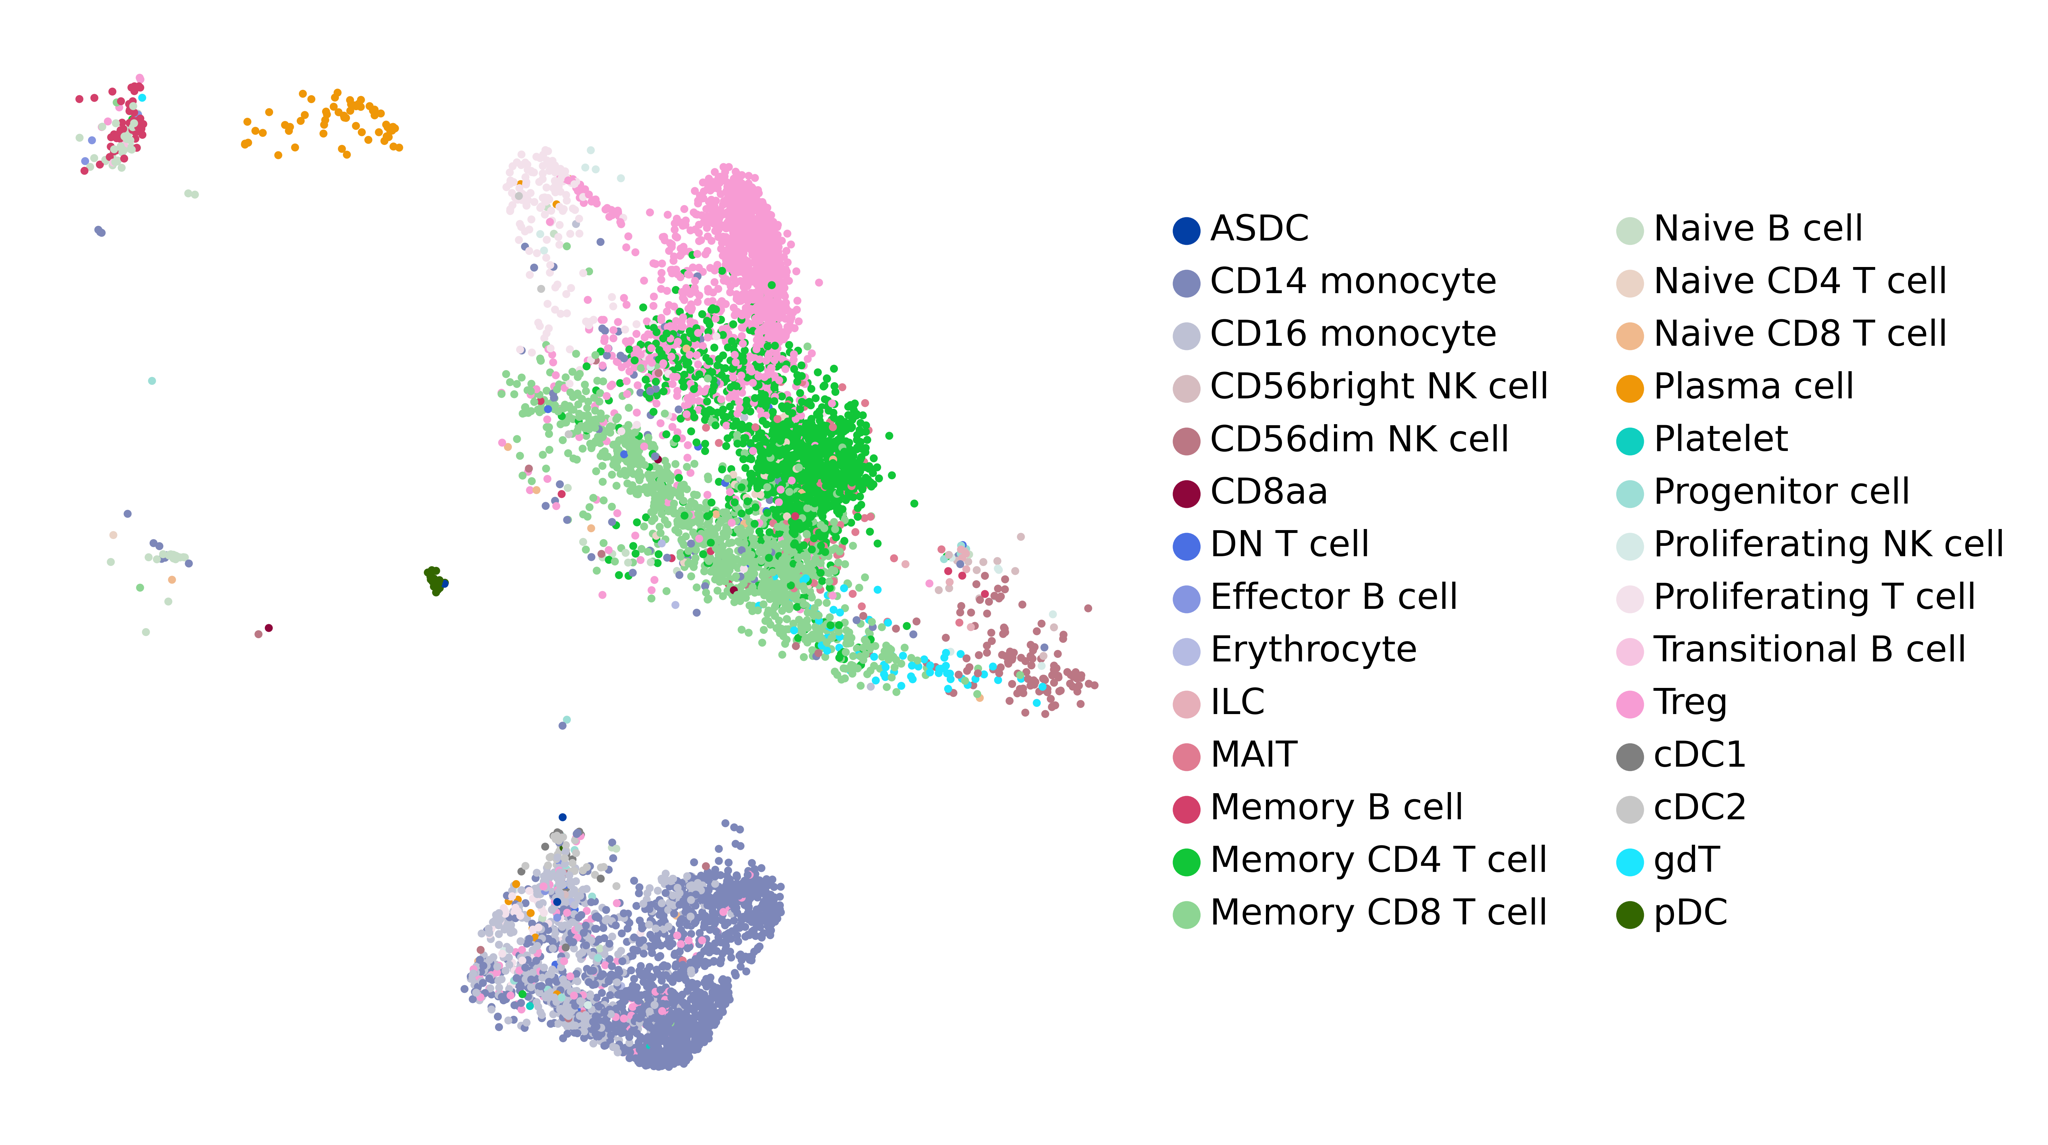

In [29]:
sc.settings.set_figure_params(dpi=400, dpi_save=500, figsize=(5,5), facecolor='white')
sc.pl.umap(
    adata, 
    color=['label'],
    frameon=False, 
   # legend_loc='on data', 
    legend_fontoutline=1, 
    legend_fontsize=9, 
    title=''
)

In [30]:
label_results = {}

for model_name, model in model_files.items():
    print(model_name)
    label_column = f'{model_name}_prediction'
    score_column = f'{model_name}_score'
    
    predictions = celltypist.annotate(
        filename = adata, 
        model = model
    )
    
    labels = predictions.predicted_labels
    labels = labels.rename({'predicted_labels': label_column}, axis = 1)

    prob = predictions.probability_matrix
    prob_scores = []
    for i in range(labels.shape[0]):
        prob_scores.append(prob.loc[labels.index.to_list()[i],labels[label_column][i]])
    labels[score_column] = prob_scores

    label_results[model_name] = labels

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 7473 cells and 36601 genes
🔗 Matching reference genes in the model


AIFI_L2


🧬 1916 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 7473 cells and 36601 genes
🔗 Matching reference genes in the model


AIFI_L3


🧬 2483 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [31]:
for model_name, label_df in label_results.items():    
    label_column = f'{model_name}_prediction'
    score_column = f'{model_name}_score'

    adata.obs[label_column] = label_df[label_column]
    adata.obs[score_column] = label_df[score_column]

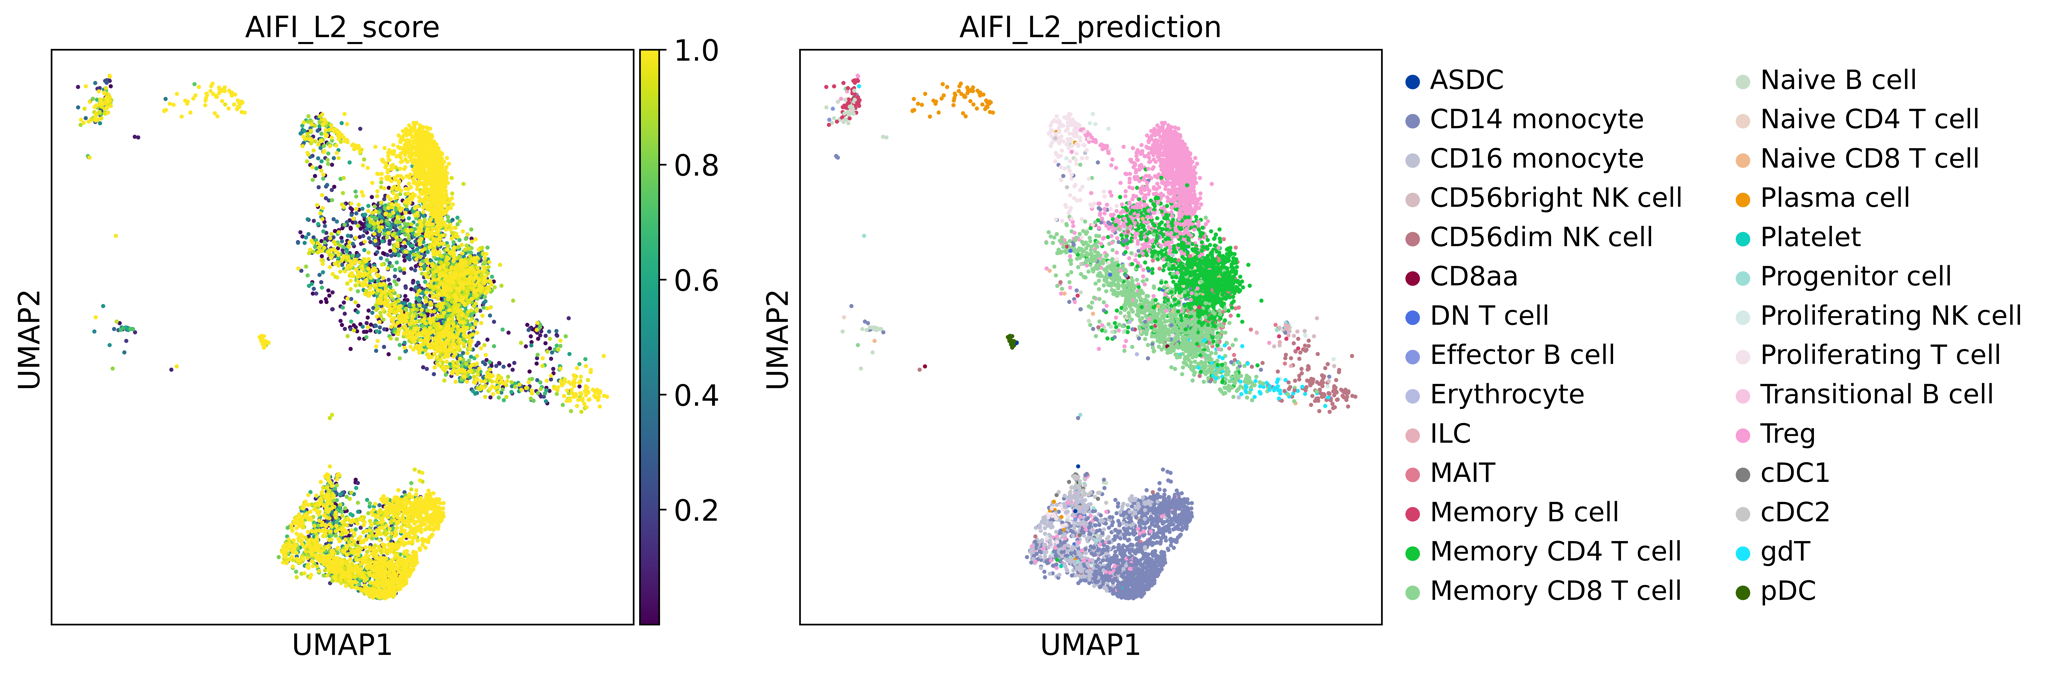

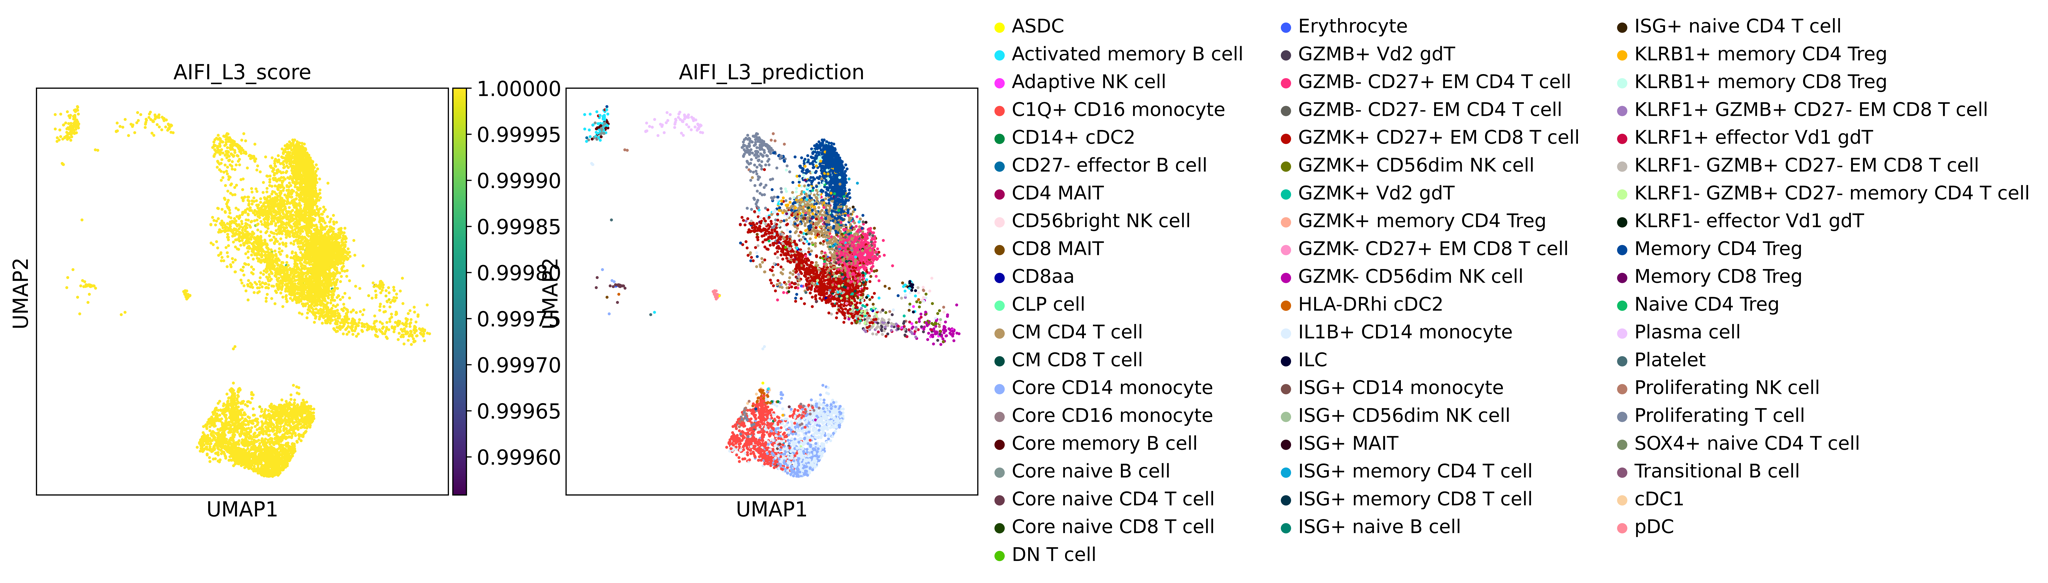

In [32]:
for model_name in label_results.keys():    
    label_column = f'{model_name}_prediction'
    score_column = f'{model_name}_score'
    
    sc.pl.umap(
        adata,
        color = [score_column, label_column]
    )